In [1]:
import numpy as np
import numpy.linalg as LA
from scipy import integrate
import matplotlib.pyplot as plt

## Метод колокації для інтегрального рівняння Фредгольма другого роду

Маємо інтегральне рівняння вигляду

$$
\varphi(x)-\lambda \int_{a}^{b} \varphi(y) K(x, y) d y = f(x), \quad x \in[a, b]
$$

Наближений розв'язок будемо шукати у вигляді

$$
\tilde{\varphi}(x)=\sum_{j=1}^{n} c_{j} \gamma_{j}(x)
$$

де $c_j$ - невідомі константи, які потрібно знайти, а $\gamma_j$ - задані лінійнонезалежні функції (в нашому випадку кусково аналітичні), $j = 1, ..., n$.

Тоді отримаємо такий вираз

$$
\sum_{j=1}^{n} c_{j}\left[\gamma_{j}(x)-\lambda \int_{a}^{b} K(x, y) \gamma_{j}(y) d y\right]=f(x)
$$

Розглянувши його на множині точок $x_i$, таких, що
$$
a \leqslant x_{1}<x_{2}<\ldots<x_{m} \leqslant b
$$

отримаємо СЛАР відносно невідомих $с_j$, $j = 1, ..., n$. 

In [2]:
# a, b = -1, 1
# K = lambda x, y: x*y + x**2
# f = lambda x: 1
# y = lambda x: 6*x**2 + 1
# lambd = 1

# eps = 1e-10

# n = 64
# h = (b - a) / (n - 1)
# xx = [ a + (h * i) for i in range(n)]
# A = np.zeros((n,n))
# print(len(xx))

In [3]:
a, b = 0, 1
K = lambda x, y: (x + 1) * np.e ** (-x * y)
f = lambda x: np.e ** (-x) - (1/2) + (1/2) * np.e ** (-(x + 1))
y = lambda x: np.e ** (-x)
lambd = 1/2
eps = 1e-10

n = 5
h = (b - a) / (n - 1)
xx = [ a + (h * i) for i in range(n)]
A = np.zeros((n,n))
print(len(xx))

5


In [4]:
len(xx)

5

In [5]:
def basicFunction(j, x, xx=xx, h=h):
    n = len(xx) - 1
    if j >= 1 and xx[j-1] <= x <= xx[j]:
        return (x - xx[j-1]) / (h)
    elif j <= n - 1 and xx[j] <= x <= xx[j+1]:
        return (xx[j+1] - x) / (h)
    else:
        return 0

In [6]:
def Collocation(xx):
    n = len(xx)
    A = np.zeros([n, n])
    
    def collocate(K):
        for i in range(n):
            for j in range(n):
                Kxi_li = lambda s: K(xx[i], s) * basicFunction(j, s)
                print()
                if (j == 0):
                    (integral, err) = integrate.quad(Kxi_li, xx[j], xx[j + 1])
                elif (j == n - 1):
                    (integral, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j])
                else:
                    (integral, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j + 1])

                A[i][j] = basicFunction(j, xx[i]) - lambd * integral
        
        return A

    return collocate

In [7]:
collocate = Collocation(xx)
A = collocate(K)

# for i in range(n):
#     for j in range(n):
        
#         Kxi_li= lambda s: K(xx[i], s) * (basicFunction(j, s))
#         if (j == 0):
#             (integral, err) = integrate.quad(Kxi_li, xx[j], xx[j + 1])
#         elif (j == n - 1):
#             (integral, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j])
#         else:
#             (integral, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j + 1])
            
#         A[i][j] = basicFunction(j, xx[i]) - lambd * integral
    

In [8]:
A = np.array(A, dtype='float')
A.shape

(5, 5)

In [9]:
ff = np.array([[f(xx[j])] for j in range(n)], dtype='float')
ff.shape

(5, 1)

In [10]:
LA.det(A)

0.4432306036491559

In [11]:
c = LA.solve(A, ff)
[ print(A[i].round(4)) for i in range(n) ]

[ 0.9375 -0.125  -0.125  -0.125  -0.0625]
[-0.0765  0.8532 -0.1379 -0.1296 -0.0621]
[-0.09   -0.1657  0.8538 -0.129  -0.0593]
[-0.1028 -0.1819 -0.1508  0.875  -0.0551]
[-0.1152 -0.1957 -0.1524 -0.1187  0.9499]


[None, None, None, None, None]

In [12]:
def y_approx(x, c=c):
    return sum([c[i][0]*basicFunction(i, x) for i in range(n)])

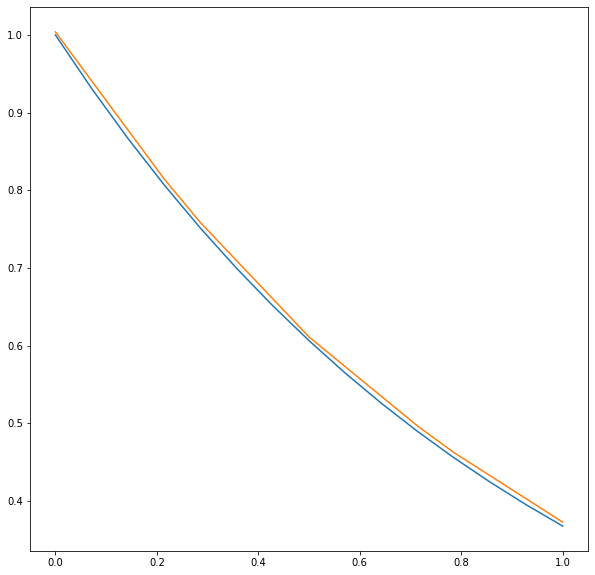

In [13]:
hh = (b - a) / (n * 3 - 1)
xxx = [ a + (hh * i) for i in range(n * 3)]

p = np.array(xxx)

plt.figure(figsize = (10,10))

plt.plot(p, y(p), p, [y_approx(p_) for p_ in p])

In [14]:
print("n: ", LA.norm(np.array([y_approx(p_) for p_ in p]) - np.array(y(p))))

n:  0.030638962178769807


In [15]:
print(np.array([y_approx(p_) for p_ in p]))
print(np.array(y(p)))

[1.00398388 0.94091111 0.87783834 0.81476557 0.75866507 0.70953685
 0.66040863 0.61128041 0.57301296 0.53474552 0.49647807 0.46244013
 0.43263171 0.40282328 0.37301486]
[1.         0.93106278 0.8668779  0.80711775 0.75147729 0.69967254
 0.65143906 0.60653066 0.56471812 0.52578802 0.48954166 0.45579402
 0.42437285 0.39511776 0.36787944]


In [16]:
# def y_approx(x, c=c):
#     [print("basic: ", basicFunction(i, x), "c: ", c[i][0], "*", basicFunction(i, x) * c[i][0]) for i in range(n)]
#     print("end")
#     return sum([c[i][0]*basicFunction(i, x) for i in range(n)])

# print(y(0), y_approx(0.8))